# Clustering Algorithms

## Hierarchical Clustering

In [52]:
from sklearn import datasets
from sklearn.metrics import mutual_info_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from pylab import *
import seaborn as sns

%matplotlib inline

We are going to use the functions that scipy provide for hierarchical agglomerative clustering. 
We will also continue working with the iris dataset

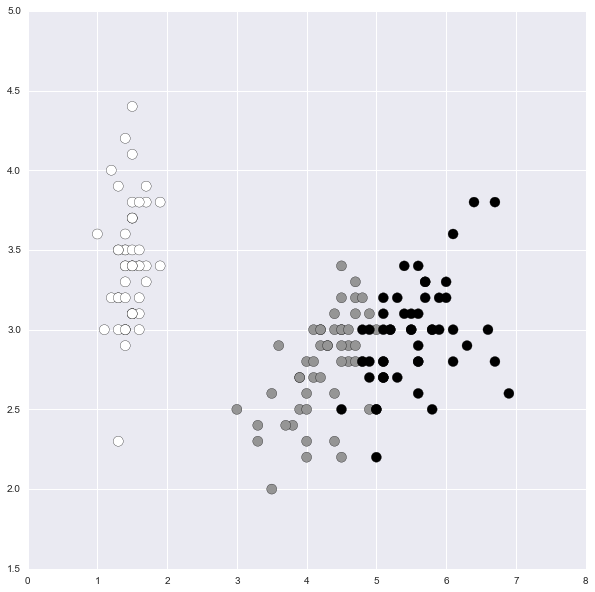

In [53]:
iris = datasets.load_iris()
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=iris['target'],s=100)

From the plot we can see that the classes from the labels do not form well separated clusters, so it is going to be difficult for hierarchical clustering to discover these three clusters. First we apply **single linkage** clustering to the iris dataset

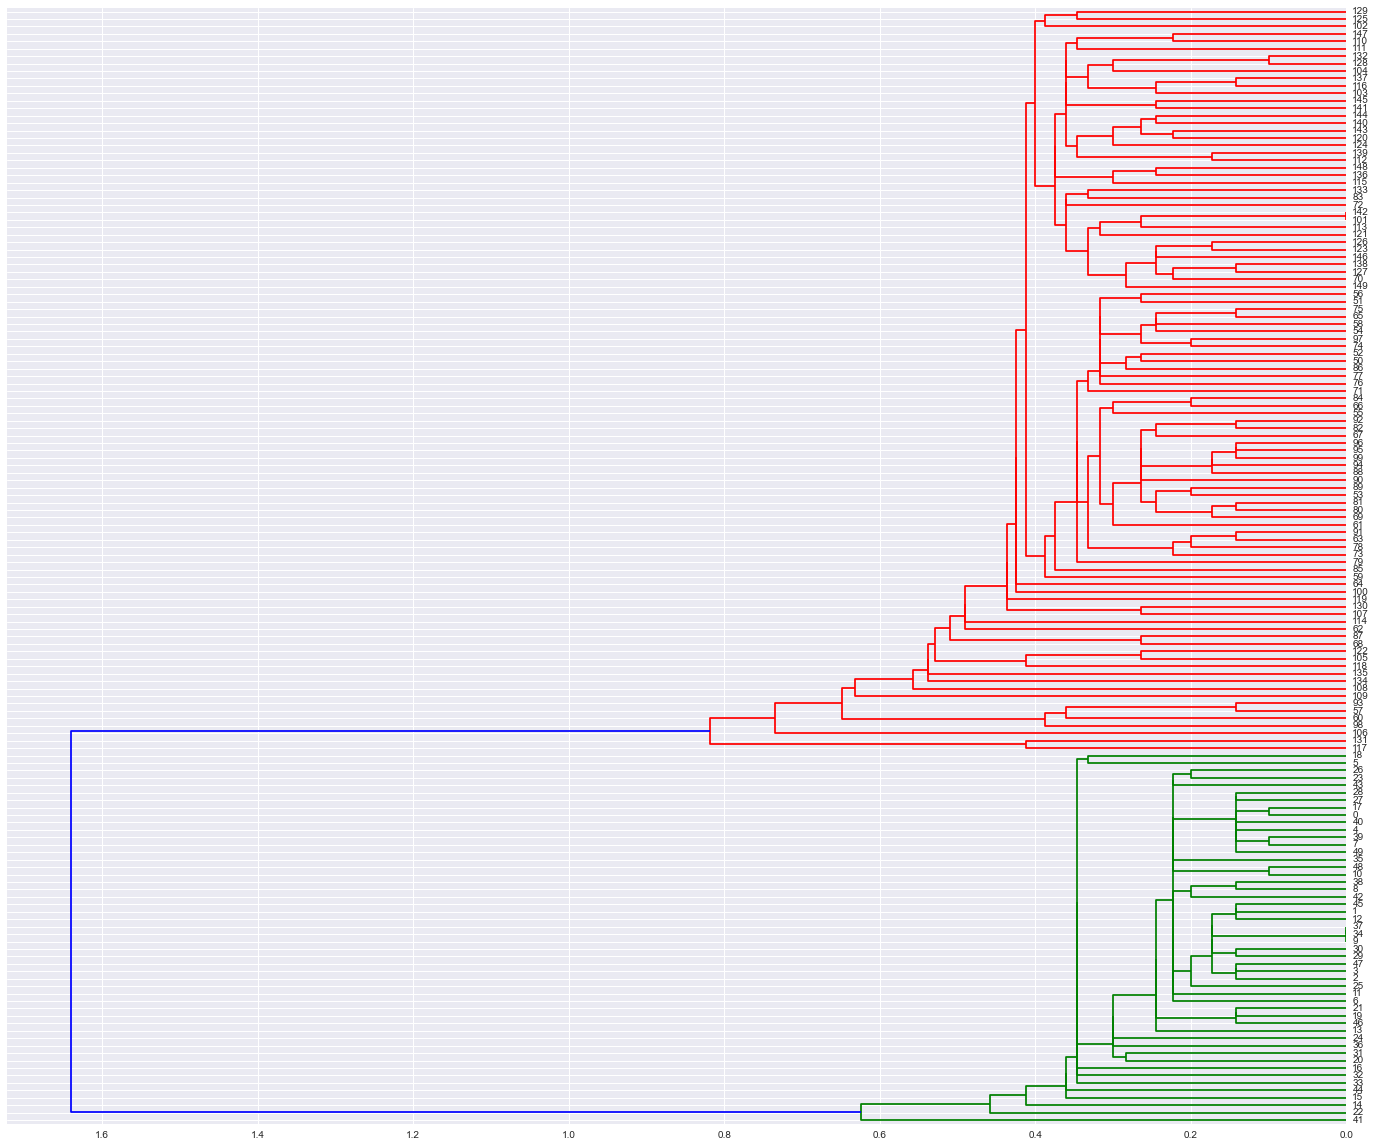

In [54]:
clust = linkage(iris['data'], method='single')

plt.figure(figsize=(24,20))
dendrogram(clust, distance_sort=True, orientation='right')
plt.show()

There is only evidence of two distinctive partitions in the dataset, some inversions also appear on the dendrogram. If we cut the dendreogram so we have tree clusters we obtain the following

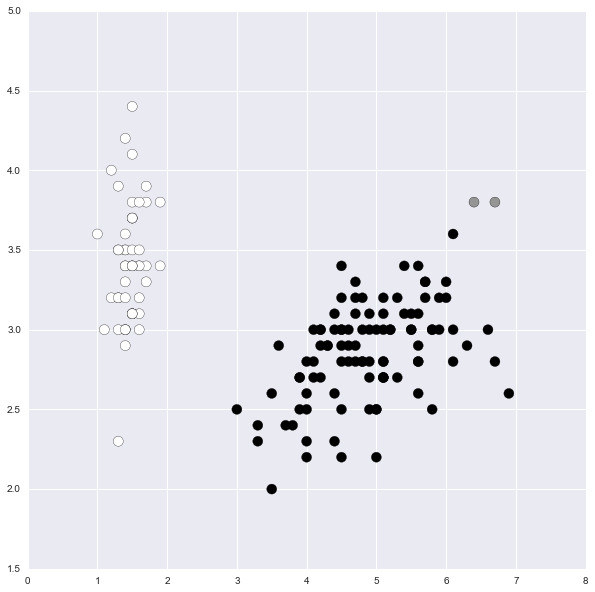

In [55]:
plt.figure(figsize=(10,10))
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=fcluster(clust, 3, criterion='maxclust'),s=100)
plt.show()

Lets apply the **complete link** criteria to the data.

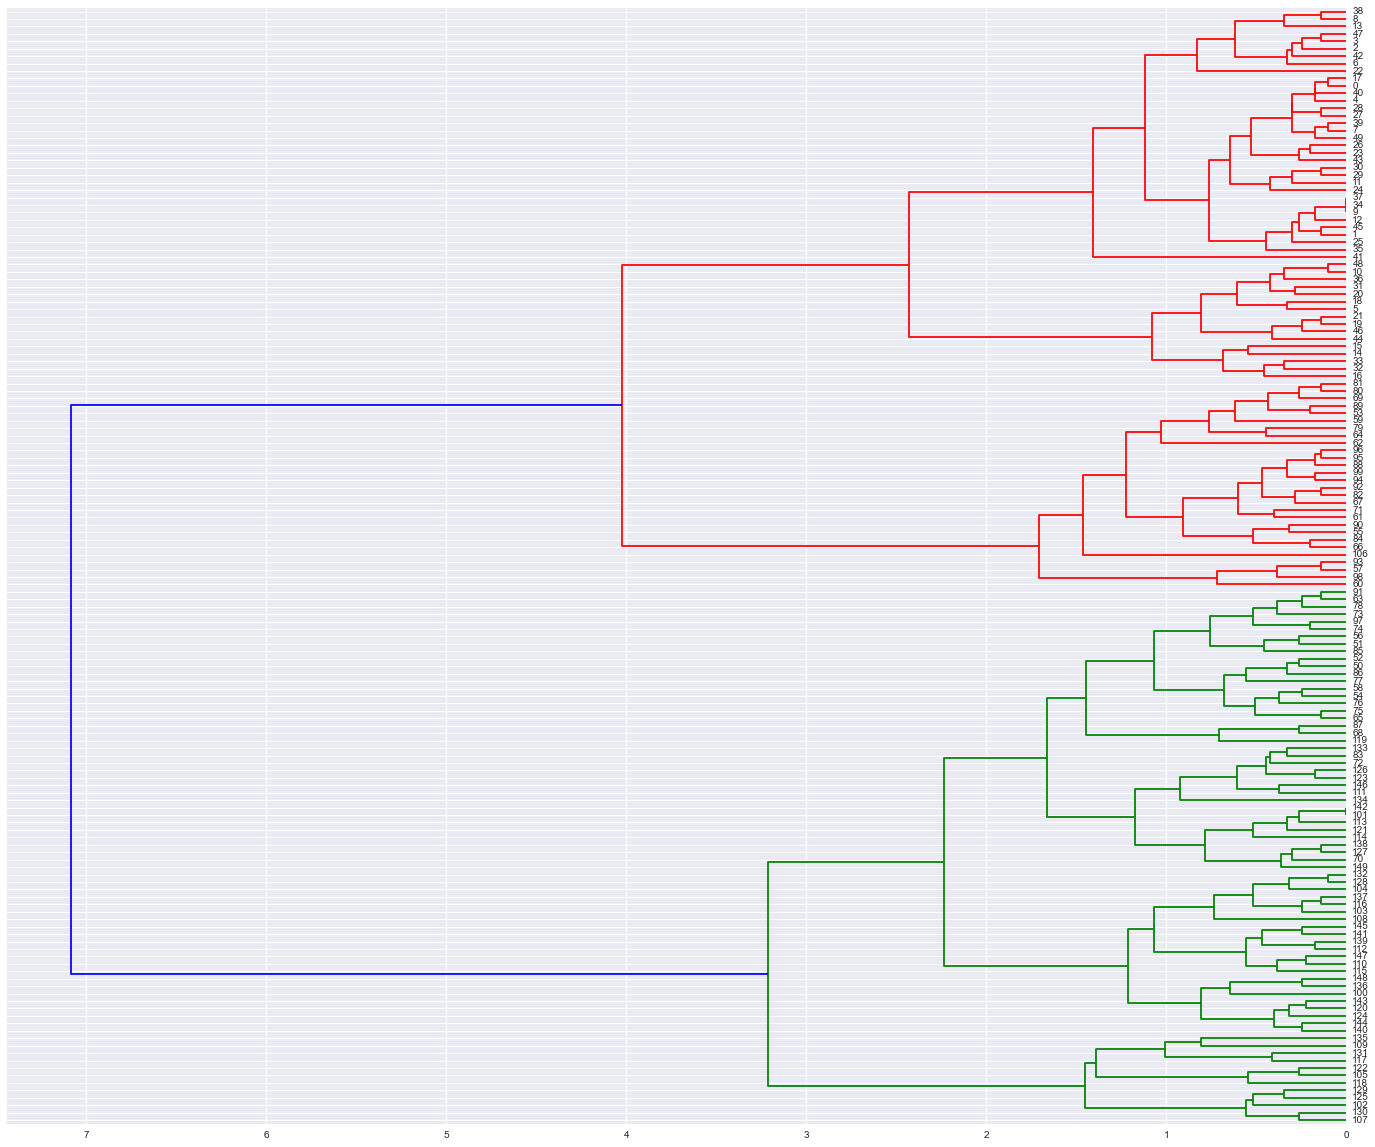

In [56]:
clust = linkage(iris['data'], method='complete')
plt.figure(figsize=(24,20))
dendrogram(clust, distance_sort=True, orientation='right')
plt.show()

Also two aparent clusters, but if we cut the dendrogram to three clusters we obtain something a little better.

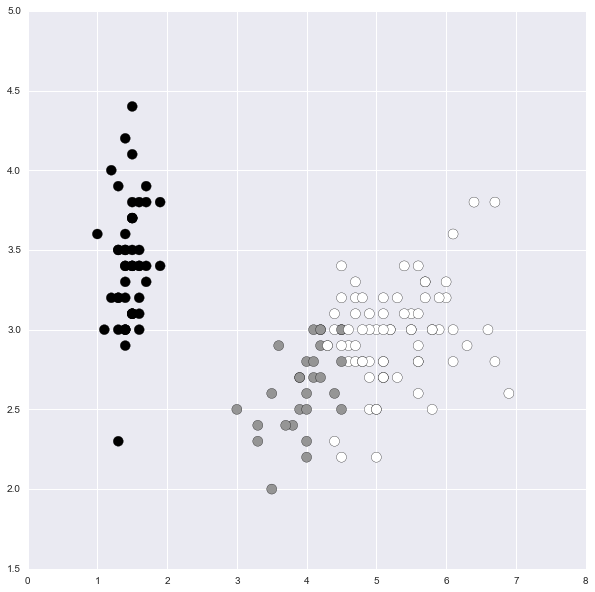

In [57]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100)
plt.show()

We can compare the true labels with the ones obtained using this clustering algorithm using for example the mutual information score

In [58]:
print mutual_info_score(iris['target'],clabels )

0.76915542268


Although it is better, the original labels are different

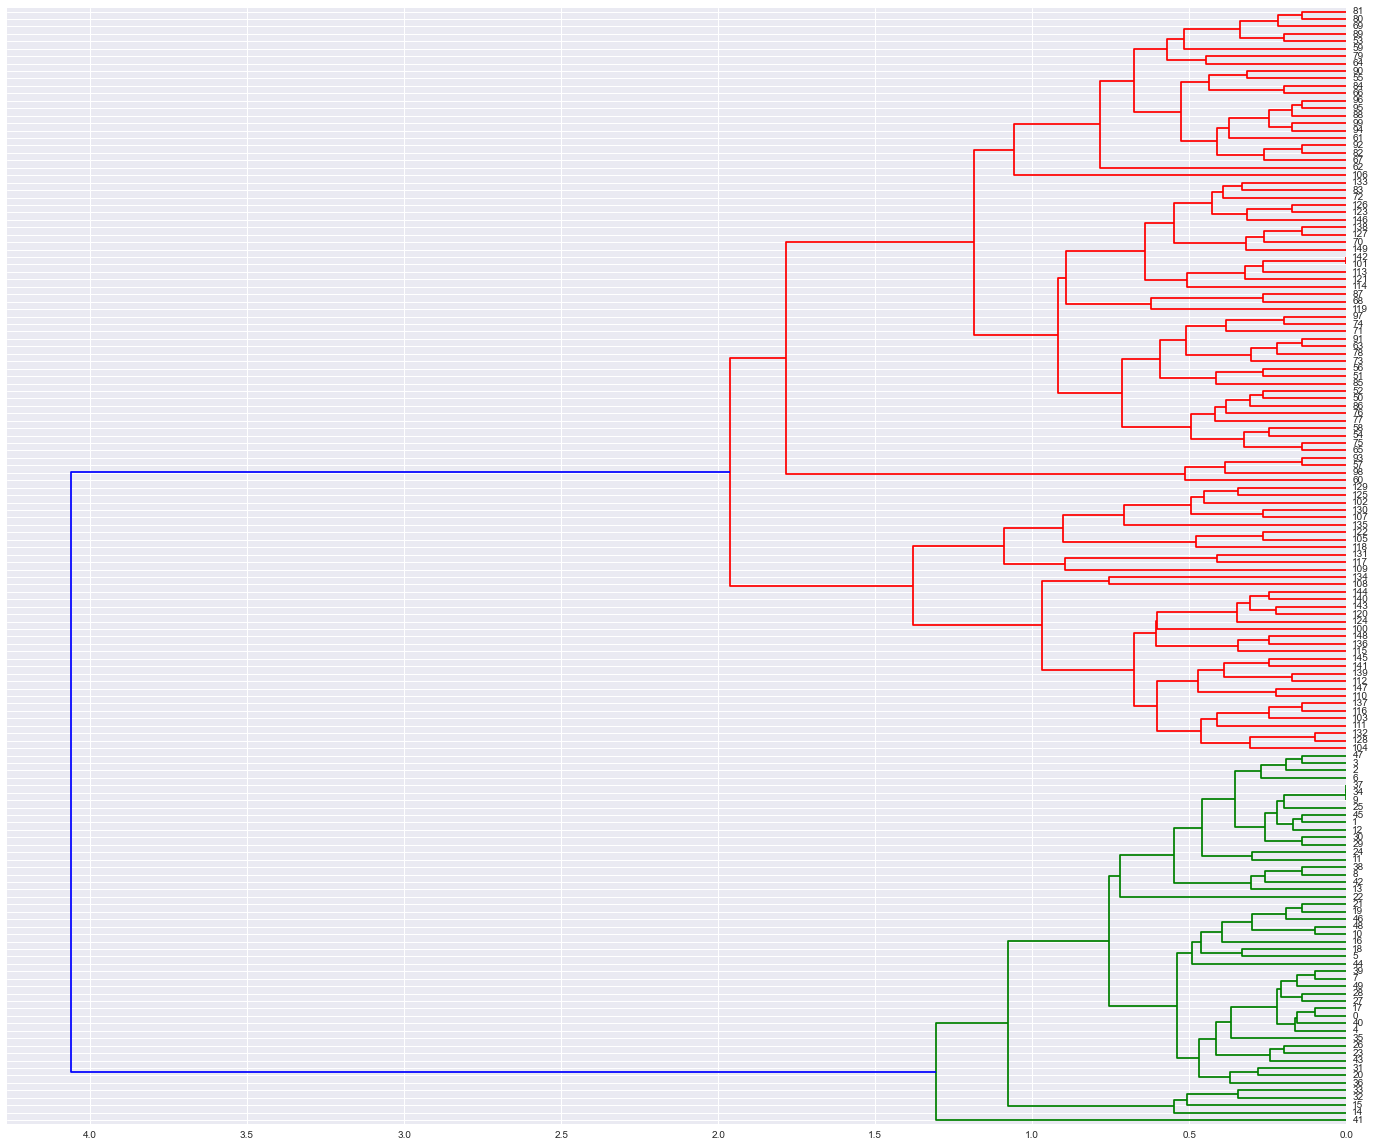

In [59]:
clust = linkage(iris['data'], method='average')
plt.figure(figsize=(24,20))
dendrogram(clust, distance_sort=True, orientation='right')
plt.show()

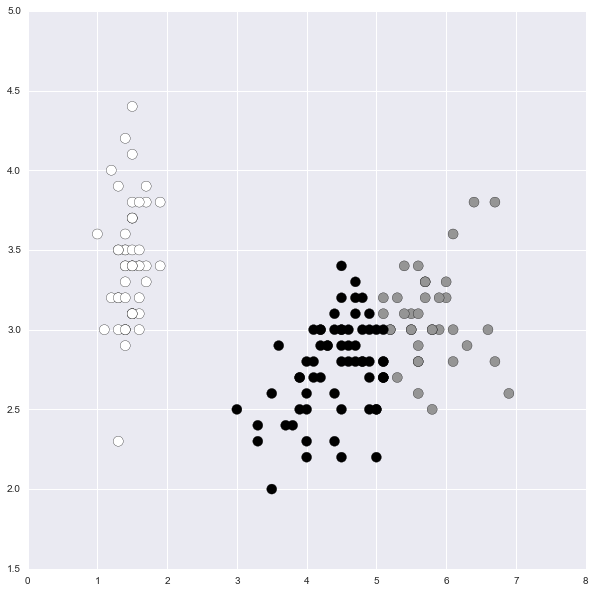

In [60]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100)
plt.show()

In [61]:
print mutual_info_score(iris['target'],clabels )

0.874475192341


In this case the mutual information scores higher for this criteria.

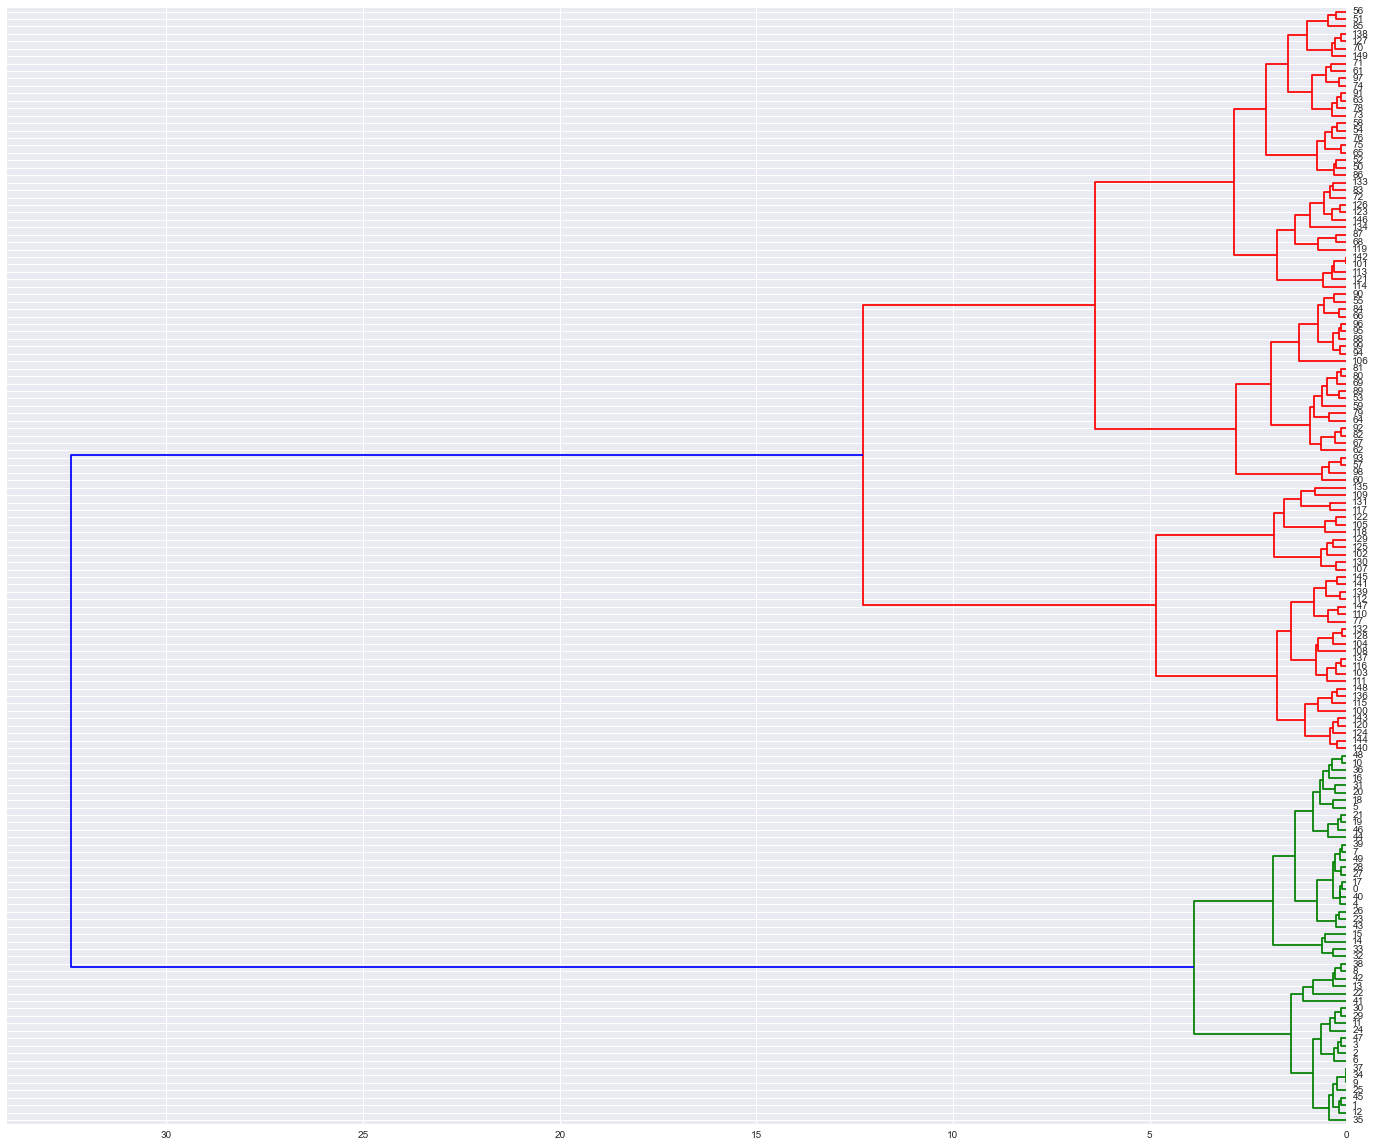

In [62]:
clust = linkage(iris['data'], method='ward')
plt.figure(figsize=(24,20))
dendrogram(clust, distance_sort=True, orientation='right')
plt.show()

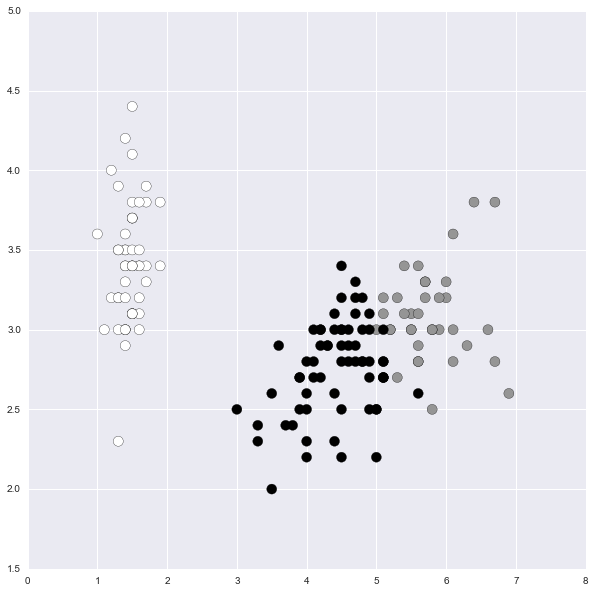

In [63]:
plt.figure(figsize=(10,10))
clabels = fcluster(clust, 3, criterion='maxclust')
plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=clabels,s=100)
plt.show()

In [64]:
print mutual_info_score(iris['target'],clabels )

0.835825159712


This criteria scores a little lower than the previous one. As we do not usually have the labels with a real unsupervise dataset we will have to use other quality criteria to decide the method to use for clustering the data.